Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



Label-to-Integer Mapping: {'Shawarma': 0, 'Sushi': 1, 'Pizza': 2}
k=1, Validation Accuracy: 71.05%
k=6, Validation Accuracy: 72.02%
k=11, Validation Accuracy: 74.45%
k=16, Validation Accuracy: 72.02%


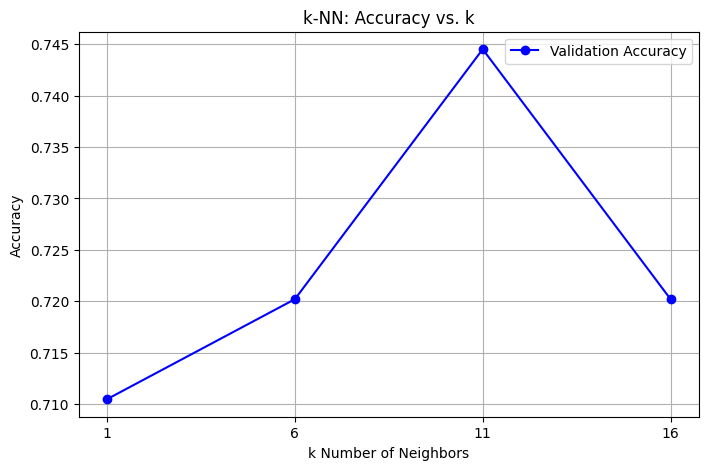

Best k found: 11
Test Set Accuracy using Best k: 65.69%


In [18]:
# Load data
file_path = "/content/clean_results.csv"  # uhh path  to the data
data = pd.read_csv(file_path, delimiter=',', skiprows=1)

# print(data[5])

# last col is target
X = data.iloc[:, :-1]  # Features
t = data.iloc[:, -1]   # Target

# categorical target labels into numerical values
unique_labels = list(set(t))
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
int_to_label = {idx: label for label, idx in label_to_int.items()}
t_encoded = np.array([label_to_int[label] for label in y])

print("Label-to-Integer Mapping:", label_to_int)

# categorical features into numerical if any, using one hot
X = pd.get_dummies(X)

# mormalize numerical features and do feature scaling
X = X.astype(float)  # Ensure all data is numeric
X_min = X.min()
X_max = X.max()
X_scaled = (X - X_min) / (X_max - X_min)

# make DataFrame to NumPy arrays
X_scaled = X_scaled.to_numpy()

# Split data: 50% train, 25% validation, 25% test
total_samples = len(X_scaled)
train_end = int(total_samples * 0.50)
valid_end = int(total_samples * 0.75)

X_train, X_valid, X_test = X_scaled[:train_end], X_scaled[train_end:valid_end], X_scaled[valid_end:]
t_train, t_valid, t_test = t_encoded[:train_end], t_encoded[train_end:valid_end], t_encoded[valid_end:]

# Define the k-NN function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, t_train, x_test, k=5):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    nearest_indices = np.argsort(distances)[:k]  # Get k closest neighbors
    nearest_labels = t_train[nearest_indices]  # Get labels of nearest neighbors
    unique, counts = np.unique(nearest_labels, return_counts=True)  # Count occurrences
    return unique[np.argmax(counts)]  # Return the most frequent class

# evaluate for different values of k
k_values = range(1, 20, 5)  # values of k from 1 to 19
accuracies = []

for k in k_values:
    t_valid_pred = np.array([knn_predict(X_train, t_train, x_val, k) for x_val in X_valid])
    accuracy = np.mean(t_valid_pred == t_valid)
    accuracies.append(accuracy)
    print(f"k={k}, Validation Accuracy: {accuracy * 100:.2f}%")

# accuracy vs. k size
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Validation Accuracy")
plt.xlabel("k Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("k-NN: Accuracy vs. k")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# Find best k
best_k = k_values[np.argmax(accuracies)]
print(f"Best k found: {best_k}")

# final test on test set
t_test_pred = np.array([knn_predict(X_train, t_train, x_test, k=best_k) for x_test in X_test])
test_accuracy = np.mean(t_test_pred == t_test)
print(f"Test Set Accuracy using Best k: {test_accuracy * 100:.2f}%")